# 简单回归模型
考虑参数为排名与身价

In [2]:
#a1,b1,c1,d1=16,19,1.35,0.988

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings("ignore")
train=np.loadtxt("X-data.csv",str,delimiter = ",",skiprows = 1)
y=train[:,-1]
ytrain=np.array([int(i) for i in y])
Xtrain=train[:,:-1]
xtrain=Xtrain.astype(float)
X=xtrain
print(X)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
model1=LogisticRegression(multi_class='multinomial',solver="lbfgs",max_iter=1000)
model1.fit(X,y)
model1.score(X,y)

[[ 1.     30.      4.43    0.3365]
 [ 1.     61.      5.86    0.74  ]
 [ 1.     24.      5.22    0.4785]
 ...
 [26.     13.      1.72    1.32  ]
 [ 4.     38.      5.07    0.2282]
 [38.      4.      0.2282  5.07  ]]


0.5714285714285714

In [4]:
def model_linear(a1,b1,c1,d1):
    test=np.array([a1,b1,c1,d1])
    test=test.reshape(-1,4)
    ype_m1=model1.predict_proba(test)
    return ype_m1

In [5]:
from sklearn.svm import SVC
svc=SVC(C=1000,kernel='rbf',gamma='scale',probability=True,decision_function_shape='ovo',random_state=30)
svc.fit(X,y)
score=svc.score(X,y)
print("正确率",score)

正确率 0.5964285714285714


In [6]:
def model_svc(a1,b1,c1,d1):
    test=np.array([a1,b1,c1,d1])
    test=test.reshape(-1,4)
    ype_3=svc.predict_proba(test)
    return ype_3

In [7]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes=bayes.fit(X, y)
score=bayes.score(X,y)
print("正确率",score)

正确率 0.6


In [8]:
def model_b(a1,b1,c1,d1):
    test=np.array([a1,b1,c1,d1])
    test=test.reshape(-1,4)
    ype_4=bayes.predict_proba(test)
    return ype_4

In [9]:
def solve(a1,b1,c1,d1):
    m_1= model_linear(a1,b1,c1,d1)
    m_2= model_svc(a1,b1,c1,d1)
    m_3= model_b(a1,b1,c1,d1)    
    temp1=np.argmax(m_1, axis=1)-1
    temp2=np.argmax(m_2, axis=1)-1
    temp3=np.argmax(m_3, axis=1)-1
    if abs(m_1[0][2]-m_1[0][0])<=0.05:
        temp1=0
    if abs(m_2[0][2]-m_2[0][0])<=0.05:
        temp2=0
    if abs(m_3[0][2]-m_3[0][0])<=0.05:
        temp3=0
    print("Model1 L:P:W=",m_1,'结果为',temp1)
    print("Model2 L:P:W=",m_2,'结果为',temp2)
    print("Model3 L:P:W=",m_3,'结果为',temp3)
    return m_1,m_2,m_3,temp1,temp2,temp3

In [10]:
def three_clevermen(a1,b1,c1,d1):
    m_1,m_2,m_3,temp1,temp2,temp3=solve(a1,b1,c1,d1)
    av=(m_1+m_2+m_3)/3
    #print("average L:P:W=",av)
    if temp1==temp2 and temp1==temp3 and temp2==temp3:
        signal=1#说明三个模型结果一致，可以进行后续规划
    else:
        signal=0#说明三个模型预测结果不一致，不进行规划
    if abs(av[0][2]-av[0][0])<=0.05:
        result=0
    else:
        temptemp=np.argmax(av, axis=1)-1
        result=temptemp
    x1=av[0]
    x2=[float(i) for i in x1]
    plist=x2[::-1]
    return plist,signal,result#result(-1代表负，0代表平，1代表胜)

In [14]:
duizhen=[[22,12,1.6,2.48],[11,24,4.74,0.465],[2,41,2.81,1.41]]
peilvtt=[[3.60,3.23,1.81],[1.31,4.65,6.2],[1.32,4.20,7.00]]
minglist=[]

# 正向投注法

In [22]:
#正方向投注法
import numpy as np
import random as random
moneylist=[]
orimoney=258
for j in range(1,1001):
    money=0
    for i in range(0,len(duizhen)):
        a1,b1,c1,d1=duizhen[i]
        peilv=peilvtt[i]
        plist,signal,result=three_clevermen(a1,b1,c1,d1)
        print("胜平负",plist)
        print("signal",signal)
        print("最终结果",result)
        result=result[0]
        if signal==0:
            money=money+0
            print("未进行规划")
        else:
            templist=[1/ttt for ttt in peilv]
            ptest=[1/sum(templist)*tttt for tttt in templist]
            print(ptest)
            trueresult=np.random.choice([1,0,-1],1,replace=True,p=ptest)
            print("预测结果为，",result,"实际结果为，",trueresult)
            if result==trueresult:
                money=orimoney/len(duizhen)*(peilv[-result+1]-1)+money
            else:
                money=money-orimoney/len(duizhen)
    moneylist.append(money)
    
exp=[i/1000 for i in moneylist]    
print(moneylist)

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4

预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0

预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0

[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806,

Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.509

Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.4704

Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47

胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.484

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4

胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.484

预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0

Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.4

signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.

预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0

Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.509

signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0

0.452
exp -15.641679999999948


'\nstring=\'盈利的概率{}\'.format(re/len(moneylist))\nplt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")\nstring1=\'四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎\'\nplt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")\n'

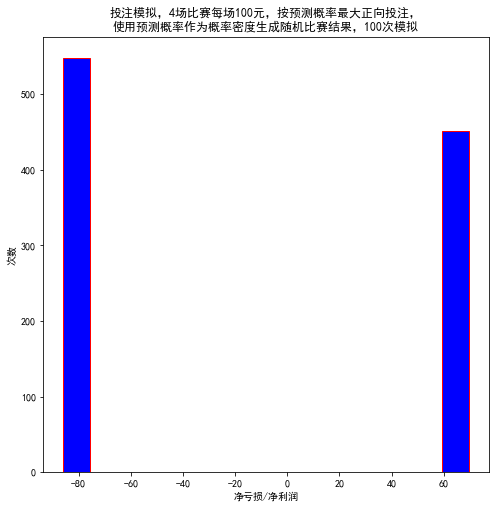

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure(figsize=(8,8))
plt.hist(moneylist,bins = 15,color = 'blue',edgecolor = 'r')
plt.title("投注模拟，4场比赛每场100元，按预测概率最大正向投注，\n使用预测概率作为概率密度生成随机比赛结果，100次模拟")
plt.xlabel("净亏损/净利润")
plt.ylabel("次数")
re=sum(i>0 for i in moneylist)
print(re/len(moneylist))
print("exp",sum(exp))
'''
string='盈利的概率{}'.format(re/len(moneylist))
plt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")
string1='四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎'
plt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")
'''

# 反向投注法

In [17]:
#正方向投注法
import numpy as np
import random as random
moneylist=[]
orimoney=258
for j in range(1,1001):
    money=0
    for i in range(0,len(duizhen)):
        a1,b1,c1,d1=duizhen[i]
        peilv=peilvtt[i]
        plist,signal,result=three_clevermen(a1,b1,c1,d1)
        print("胜平负",plist)
        print("signal",signal)
        print("最终结果",result)
        result=result[0]
        if signal==0:
            money=money+0
            print("未进行规划")
        else:
            result=-result
            templist=[1/ttt for ttt in peilv]
            ptest=[1/sum(templist)*tttt for tttt in templist]
            print(ptest)
            trueresult=np.random.choice([1,0,-1],1,replace=True,p=ptest)
            print("预测结果为，",result,"实际结果为，",trueresult)
            if result==trueresult:
                money=orimoney/len(duizhen)*(peilv[-result+1]-1)+money
            else:
                money=money-orimoney/len(duizhen)
    moneylist.append(money)
    
exp=[i/1000 for i in moneylist]
#print("期望为",exp)
print(moneylist)

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.509221

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151

[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.125475

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846

最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672

预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.271

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.234153192556

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.125475

Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.190662

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.1415

Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.1006736

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.484

[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.484

最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151

预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.188692

预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869

预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.125475

预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.2091

Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.19127

胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.4845992

最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.141519

Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.141519

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846

预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.209125

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.100673

Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.4704026

预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.125475

胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.484599

预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.271

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.484

预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.1886

胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [-1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.148193

Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [-1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151

Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [1]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264

预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.209125

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846958979254115]
预测结果为， 1 实际结果为， [0]
Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.141519

Model1 L:P:W= [[0.1912765  0.26620376 0.54251974]] 结果为 [1]
Model2 L:P:W= [[0.24194191 0.22751872 0.53053937]] 结果为 [1]
Model3 L:P:W= [[0.05121508 0.25753945 0.69124547]] 结果为 [1]
胜平负 [0.5881015264996216, 0.25042064294571637, 0.16147783055466192]
signal 1
最终结果 [1]
[0.669787540511343, 0.18869283399351816, 0.14151962549513863]
预测结果为， -1 实际结果为， [0]
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， -1 实际结果为， [1]
Model1 L:P:W= [[0.47040264 0.25798408 0.27161329]] 结果为 [-1]
Model2 L:P:W= [[0.5092214  0.22127583 0.26950277]] 结果为 [-1]
Model3 L:P:W= [[0.48459928 0.22319967 0.29220105]] 结果为 [-1]
胜平负 [0.2777723674768864, 0.23415319255672806, 0.4880744399663855]
signal 1
最终结果 [-1]
[0.243694326456943, 0.2716097756176455, 0.4846

0.447
exp -18.954399999999744


'\nstring=\'盈利的概率{}\'.format(re/len(moneylist))\nplt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")\nstring1=\'四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎\'\nplt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")\n'

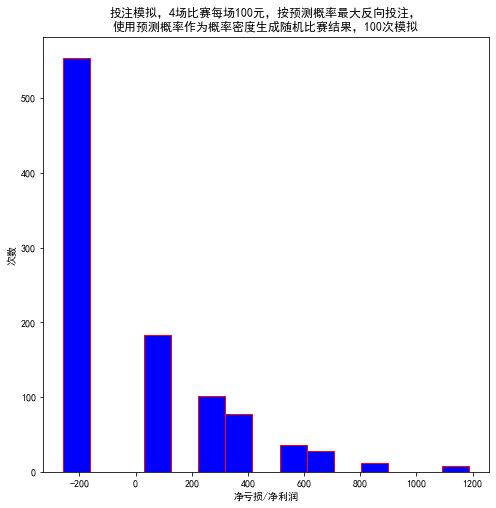

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure(figsize=(8,8))
plt.hist(moneylist,bins = 15,color = 'blue',edgecolor = 'r')
plt.title("投注模拟，4场比赛每场100元，按预测概率最大反向投注，\n使用预测概率作为概率密度生成随机比赛结果，100次模拟")
plt.xlabel("净亏损/净利润")
plt.ylabel("次数")
re=sum(i>0 for i in moneylist)
print(re/len(moneylist))
print("exp",sum(exp))
'''
string='盈利的概率{}'.format(re/len(moneylist))
plt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")
string1='四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎'
plt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")
'''

# 凯利投注法


# 最新尝试
使用凯利公式

定义总预期投资N

$<\Delta lnN>=\sum_{i=1}^n p_iln(1+r_if)$



In [19]:
def Kaili(i):
    sum=0
    sum=(peilv[i]*plist[i]-1)/(peilv[i]-1)
    return sum
def Kailiguihua(pist,peilv):
    rlist=[i-1 for i in peilv]
    explist=[rlist[i]*plist[i]-(1-plist[i]) for i in range(0,3)]
    print('explist',explist)
    g=[]
    for i in range(0,3):
        if explist[i]>0:
            if i==0:
                temp = '胜'
            if i==1:
                temp = '平'
            if i==2:
                temp = '负'
            print("下注压 {} 期望大于0，可以进行后续规划".format(temp))
            K=Kaili(i)
            print("由凯利公式得出投资比例为：{}".format(K))
            g.append(K)
        else:
            g.append(0)
    if sum(g)==0:
        print("本场期望小于0，不值得押注")
        signal=0
    else:
        signal=1
    return g,signal#返回一个比例列表和signal
    

In [30]:
#Kaili投注法
import numpy as np
import random as random
moneylist=[]
orimoney=1000
totle=0
for j in range(1,1001):
    money=0
    totol=0
    for i in range(0,len(duizhen)):
        a1,b1,c1,d1=duizhen[i]
        peilv=peilvtt[i]
        plist,signal,result=three_clevermen(a1,b1,c1,d1)
        print("胜平负",plist)
        print("signal",signal)
        print("最终结果",result)
        result=result[0]
        if signal==0:
            money=money+0
            print("未进行规划")
        else:
            templist=[1/ttt for ttt in peilv]
            ptest=[1/sum(templist)*tttt for tttt in templist]
            print(ptest)
            trueresult=np.random.choice([1,0,-1],1,replace=True,p=ptest)
            print("预测结果为，",result,"实际结果为，",trueresult)
            trueresult=trueresult[0]
            g,signal1=Kailiguihua(plist,peilv)
            zongtouru=orimoney*(g[0]+g[1]+g[2])
            print("总投入为",zongtouru)
            print(g[0],g[1],g[2])
            if signal1==0:
                money=money+0
                print("未进行规划")
            #elif min(plist)<0.2:
                #money=money+0
            else:                
                #if result==trueresult:
                money=orimoney*g[-trueresult+1]*(peilv[-trueresult+1])-zongtouru+money
                print("1",orimoney*g[-result+1]*(peilv[-trueresult+1]))
                #else:
                #money=money-zongtouru
                totol=totol+zongtouru
    print("本场投注结果为：",money)
    moneylist.append(money)
    
exp=[i/1000 for i in moneylist]    
print(moneylist)

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [0]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 69.79580674718129
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025

本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646

预测结果为， 1 实际结果为， [0]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 69.79580674718129
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2

[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247


Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.210953772156460

Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，

最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.4043111

胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845

Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [0]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 69.79580674718129
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以

最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.4043111

总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 69.79580674718129
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.665399

Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.210953772156460

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646

Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.210953772156460

胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.210953772156460

预测结果为， 1 实际结果为， [-1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 2.4256702783605775
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Mode

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [0]
explist [-0.210953772156460

Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.210953772156460

Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行

Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [0]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行

0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： 69.79580674718129
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.20912547528517111, 0.12547528517110265]
预测结果为， 1 实际结果为， [1]
explist [-0.21095377215646025, 0.07405723266135356, 0.025568555485033673]
下注压 平 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.023142885206672986
下注压 负 期望大于0，可以进行后续规划
由凯利公式得出投资比例为：0.004261425914172261
总投入为 27.404311120845247
0 0.023142885206672986 0.004261425914172261
1 0.0
本场投注结果为： -27.404311120845247
Model1 L:P:W= [[0.10067366 0.2066236  0.69270274]] 结果为 [1]
Model2 L:P:W= [[0.19066258 0.33463468 0.47470275]] 结果为 [1]
Model3 L:P:W= [[0.14819315 0.22592545 0.62588139]] 结果为 [1]
胜平负 [0.5977622938208634, 0.2557279125384175, 0.1465097936407191]
signal 1
最终结果 [1]
[0.6653992395437263, 0.2091254752

[69.79580674718129, -27.404311120845247, -27.404311120845247, 2.4256702783605775, -27.404311120845247, -27.404311120845247, 2.4256702783605775, -27.404311120845247, -27.404311120845247, -27.404311120845247, 69.79580674718129, -27.404311120845247, 69.79580674718129, -27.404311120845247, 69.79580674718129, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, 69.79580674718129, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, 69.79580674718129, 69.79580674718129, 2.4256702783605775, -27.404311120845247, -27.404311120845247, -27.404311120845247, -27.404311120845247, 2.4256702783605775, 69.79580674718129, -27.404311120845247, -27.404311120845247, 2.4256702783605775, -27.404311120845247, -27.404311120845247, -27.404311120845247, 2.4256702783605775, -27.404311120845247, -27.404311120845247, -27.404311120

0.326
实际总投入 27.404311120845247
总准备拿出多少钱：1000
exp -3.8688592085959534


'\nstring=\'盈利的概率{}\'.format(re/len(moneylist))\nplt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")\nstring1=\'四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎\'\nplt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")\n'

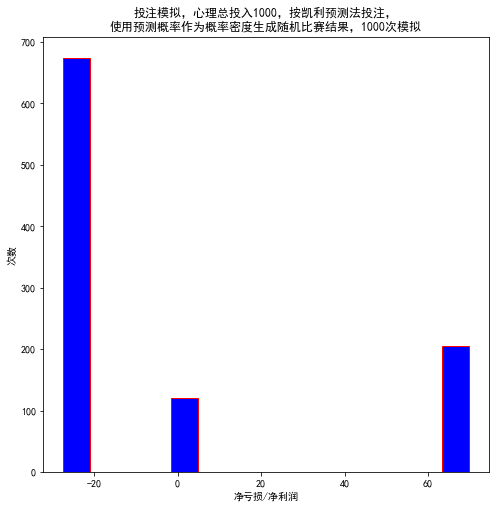

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
fig=plt.figure(figsize=(8,8))
plt.hist(moneylist,bins = 15,color = 'blue',edgecolor = 'r')
plt.title("投注模拟，心理总投入1000，按凯利预测法投注，\n使用预测概率作为概率密度生成随机比赛结果，1000次模拟")
plt.xlabel("净亏损/净利润")
plt.ylabel("次数")
re=sum(i>0 for i in moneylist)
print(re/len(moneylist))
print("实际总投入",totol)
print("总准备拿出多少钱：1000")
print("exp",sum(exp))
'''
string='盈利的概率{}'.format(re/len(moneylist))
plt.text(1500,4200,string,fontsize=15,verticalalignment="top",horizontalalignment="right")
string1='四场比赛为:\n阿根廷VS沙特\n 丹麦VS突尼斯\n 墨西哥VS波兰\n 法国VS澳大利亚\n np.random.choice随机生成结果有一定偏差\n投钱需谨慎'
plt.text(1500,4000,string1,fontsize=15,verticalalignment="top",horizontalalignment="center")
'''

In [ ]:
#fengexian

In [ ]:
plist=x2

M=1000#总规划资金
rlist=[i-1 for i in peilv]
print(rlist)
explist=[rlist[i]*plist[i]-(1-plist[i]) for i in range(0,3)]
print(explist)
g=[]
def Kaili(i):
    sum=0
    sum=(peilv[i]*plist[i]-1)/(peilv[i]-1)
    return sum
for i in range(0,3):
    if explist[i]>0:
        if i==0:
            temp = '胜'
        if i==1:
            temp = '平'
        if i==2:
            temp = '负'
        print("下注压 {} 期望大于0，可以进行后续规划".format(temp))
        K=Kaili(i)
        print("由凯利公式得出投资比例为：{}".format(K))
        g.append(K)
    else:
        g.append(0)
if sum(g)==0:
    print("本场期望小于0，不值得押注")

In [ ]:
def fun(x):
    Exp=-(x[0]*plist[0]*peilv[0]+x[1]*plist[1]*peilv[1]+x[2]*plist[2]*peilv[2])
    return Exp
fun1=lambda x:M-(x[0]+x[1]+x[2])
fun2=lambda x:M*g[0]-x[0]
fun3=lambda x:M*g[1]-x[1]
fun4=lambda x:M*g[2]-x[2]
_constraints=({'type':'ineq','fun':fun1},{'type':'ineq','fun':fun2} ,{'type':'ineq','fun':fun3},{'type':'ineq','fun':fun4})  # 限制，ineq代表不等于,eq代表等于
_bounds=((0,M),(0,M),(0,M))  # 优化范围
import scipy.optimize as so
result=so.minimize(fun,(M/3,M/3,M/3),method='COBYLA',
                   bounds=_bounds,constraints=_constraints)
if result.success==False:
    print("这场达不到期望，投注不了")
else:
    print("W投注",result.x[0])
    print("P投注",result.x[1])
    print("F投注",result.x[2])
    x=result.x
    c=x[0]+x[1]+x[2]
    print("投入资金总数：",c)
    print("最终结果为胜利的获利：",x[0]*peilv[0]-(c-x[0]),'预测概率为',plist[0])
    print("最终结果为平局的获利：",x[1]*peilv[1]-(c-x[1]),'预测概率为',plist[1])
    print("最终结果为负局的获利：",x[2]*peilv[2]-(c-x[2]),'预测概率为',plist[2])
    print("与只投注一种结果相比")
    print("只压胜投入：",M*g[0])
    print("最终结果为胜利的获利：",x[0]*peilv[0]-M*g[0],'预测概率为',plist[0])
    print("损失：",M*g[0],'的概率',1-plist[0])
    if g[0]!=0:
        print("风险回报比",M*g[0]*peilv[0]/M/g[0])
    print("只压平投入：",M*g[1])
    print("最终结果为平局的获利：",x[1]*peilv[1]-M*g[1],'预测概率为',plist[1])
    print("损失：",M*g[1],'的概率',1-plist[1])
    if g[1]!=0:
        print("风险回报比",M*g[1]*peilv[1]/M/g[1])
    print("只压负投入：",M*g[2])
    print("最终结果为负局的获利：",x[2]*peilv[2]-M*g[2],'预测概率为',plist[2])
    print("损失：",M*g[2],'的概率',1-plist[2])
    if g[2]!=0:
        print("风险回报比",M*g[2]*peilv[2]/M/g[2])